# Importation des packages

In [42]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [43]:

# Importation des données
data = pd.read_csv("boston.csv",index_col=0)

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [4]:

# Renommage des colonnes 
data.columns = ["Taux_criminalite", "Prop_terrains_resid", "Prop_acres_indus", "Bordure_riviere", "Concentration_NO2",
                "Nb_pieces_logement", "Prop_log_construits_av1940", "Dist_ponderees_emploi", "Accessibilite_autoroute",
                "Taux_impot_foncier", "Ratio_eleve_prof", "Prop_noirs_ville", "Pourcentage_pop_inf", "Valeur_med_logement"]



# Affichage des 5 premières lignes de la base de données avec les noms de colonnes renommés
data.head()


,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1. **Taux_criminalite :** Taux de criminalité par habitant par ville.
2. **Prop_terrains_resid :** Proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés.
3. **Prop_acres_indus :** Proportion d'acres industriels non commerciaux par ville.
4. **Bordure_riviere :** Variable fictive Charles River (= 1 si le tronçon borde la rivière ; 0 sinon).
5. **Concentration_NO2 :** Concentration de dioxyde d'azote (parties par 10 millions).
6. **Nb_pieces_logement :** Nombre moyen de pièces par logement.
7. **Prop_log_construits_av1940 :** Proportion de logements occupés par leur propriétaire construits avant 1940.
8. **Dist_ponderees_emploi :** Distances pondérées aux cinq centres d'emploi de Boston.
9. **Accessibilite_autoroute :** Indice d'accessibilité aux autoroutes radiales.
10. **Taux_impot_foncier :** Taux d'impôt foncier sur la valeur totale de la propriété.
11. **Ratio_eleve_prof :** Ratio élève-professeur par ville.
12. **Prop_noirs_ville :** Proportion de la population noire par ville.
13. **Pourcentage_pop_inf :** Pourcentage de statut inférieur de la population.
14. **Valeur_med_logement :** Valeur médiane des maisons occupées par leur propriétaire en milliers de dollars

In [5]:
#Valeurs manquantes

data.isnull().sum()

Taux_criminalite              0
Prop_terrains_resid           0
Prop_acres_indus              0
Bordure_riviere               0
Concentration_NO2             0
Nb_pieces_logement            0
Prop_log_construits_av1940    0
Dist_ponderees_emploi         0
Accessibilite_autoroute       0
Taux_impot_foncier            0
Ratio_eleve_prof              0
Prop_noirs_ville              0
Pourcentage_pop_inf           0
Valeur_med_logement           0
dtype: int64

## Analyse sur la base globale

In [6]:
# Résumé statistique des variables
data.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


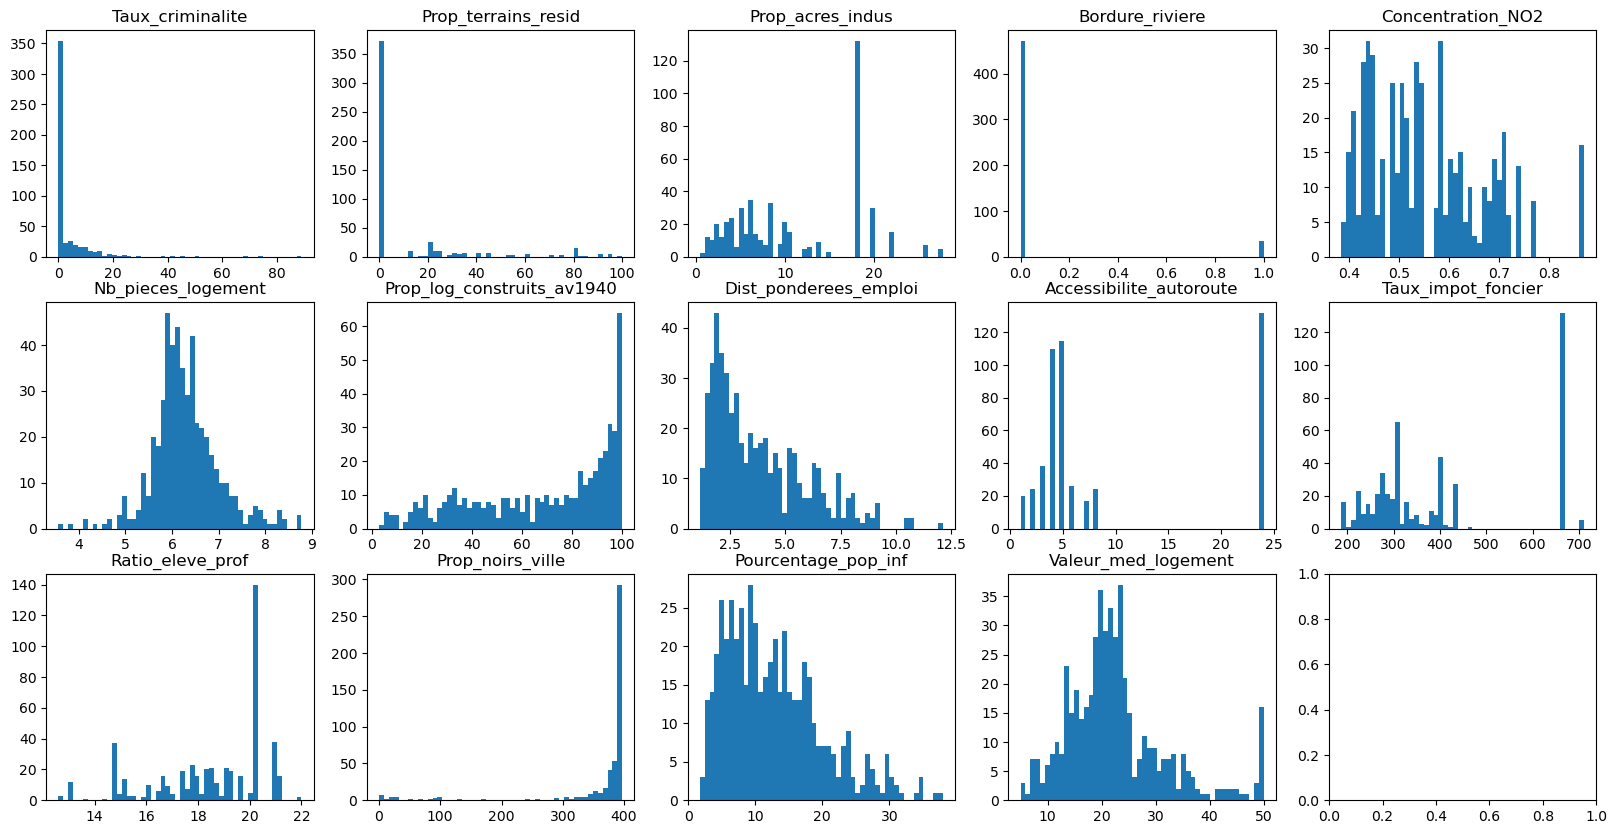

In [7]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(data.columns):
    axs[i].hist(data[column], bins=50)
    axs[i].set_title(column)

plt.show()

## Distribution des variables

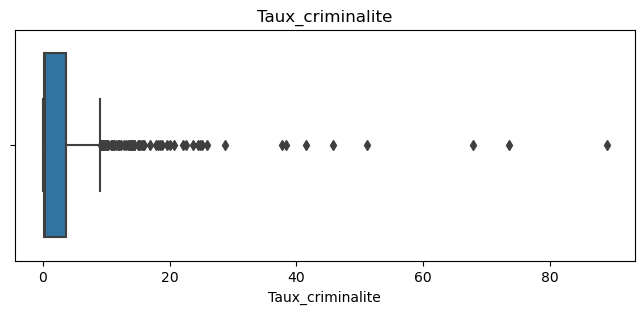

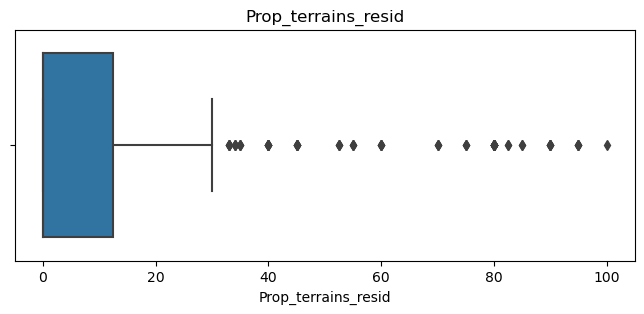

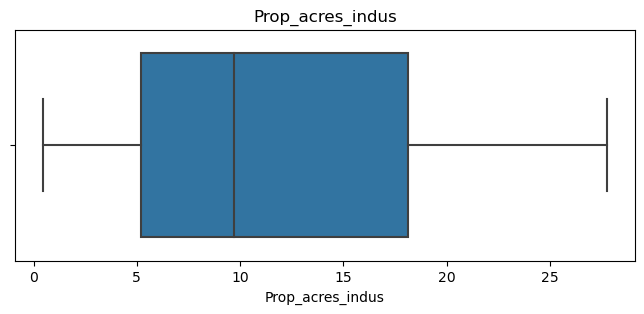

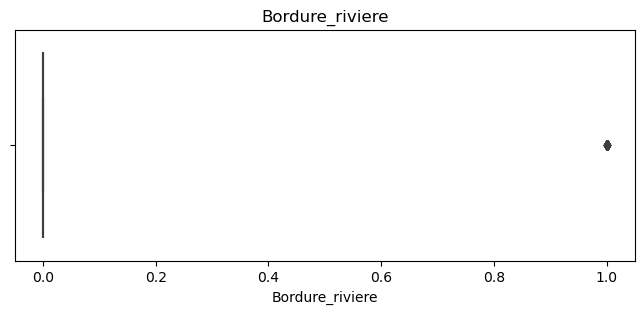

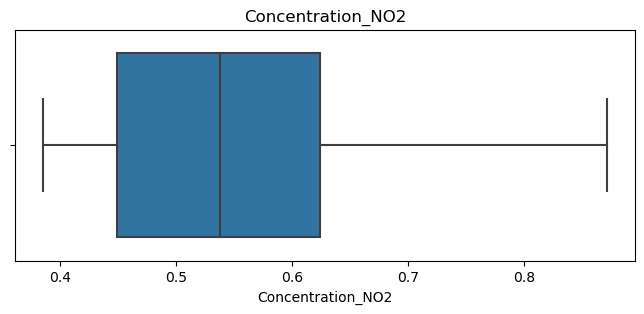

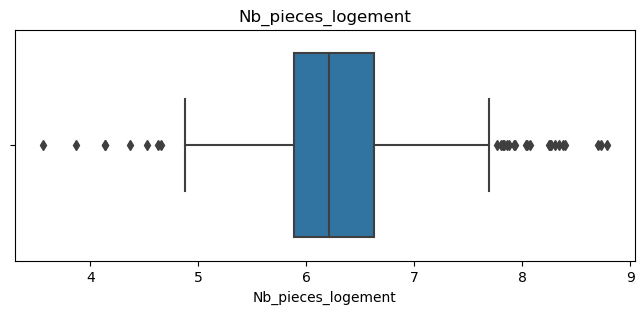

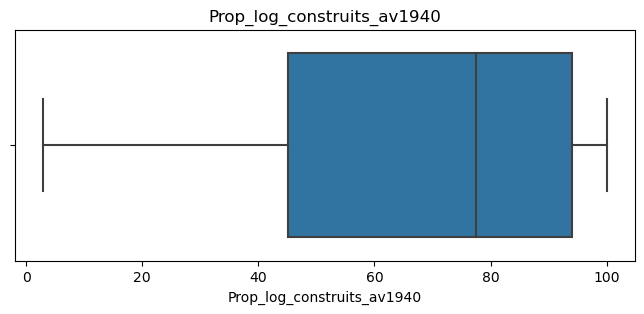

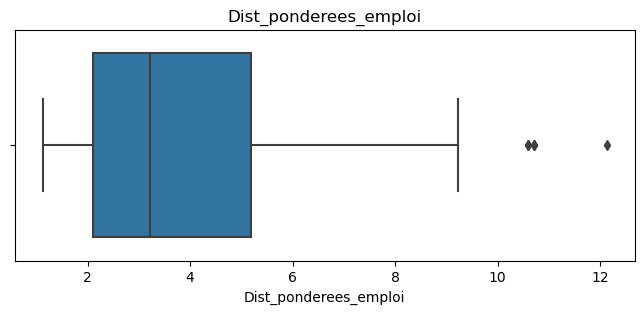

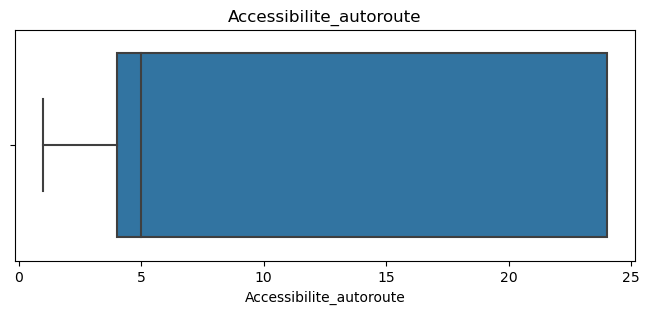

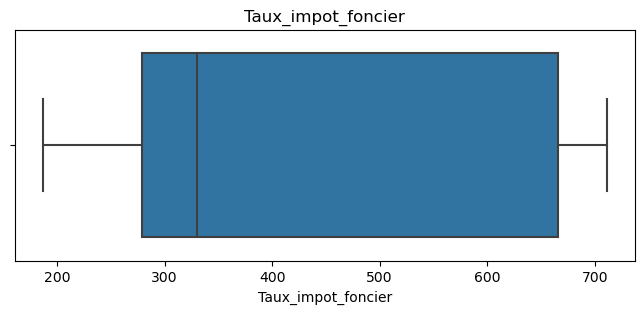

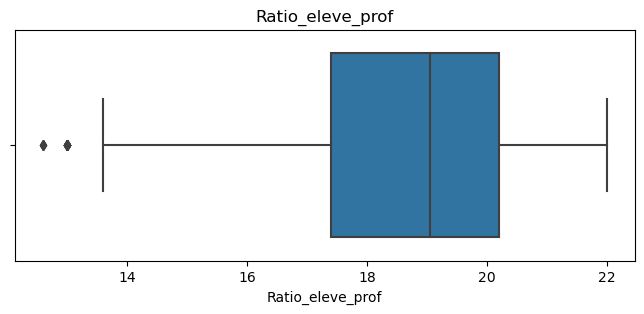

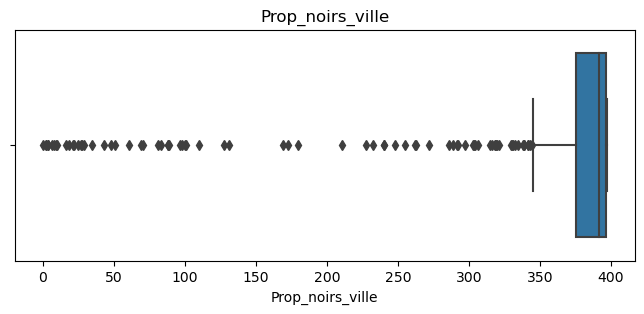

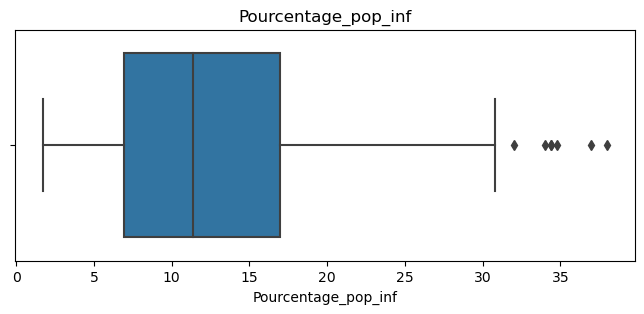

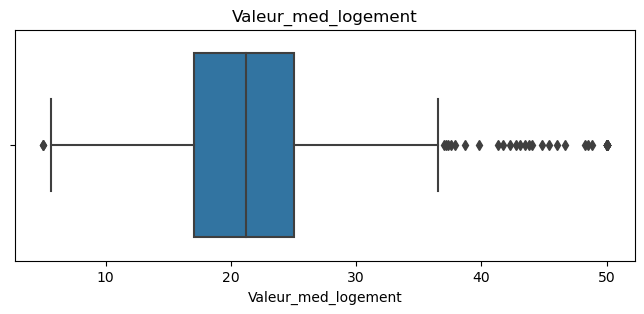

In [8]:
import seaborn as sns

# Tracé des boxplots pour chaque variable
for column in data.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=data[column], ax=ax)
    plt.title(column)
    plt.show()

## Corrélation entre les variables

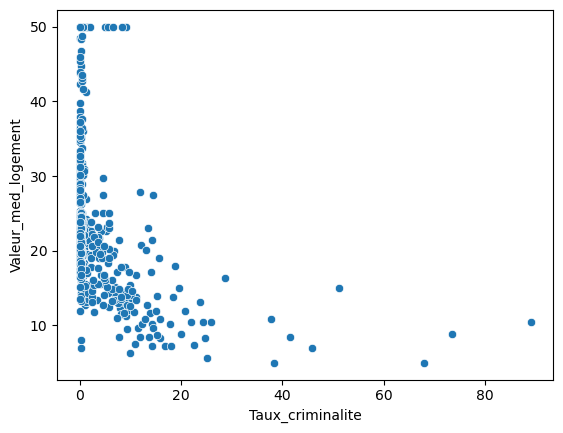

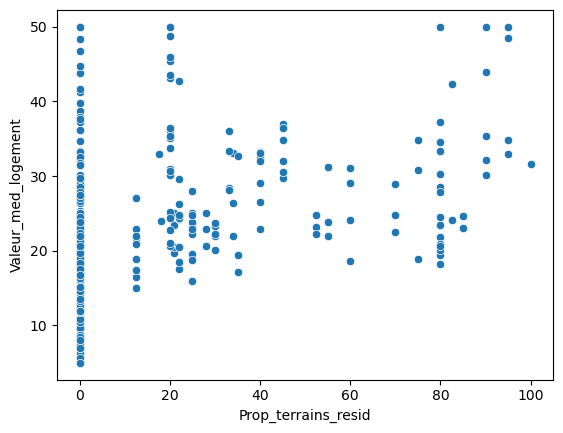

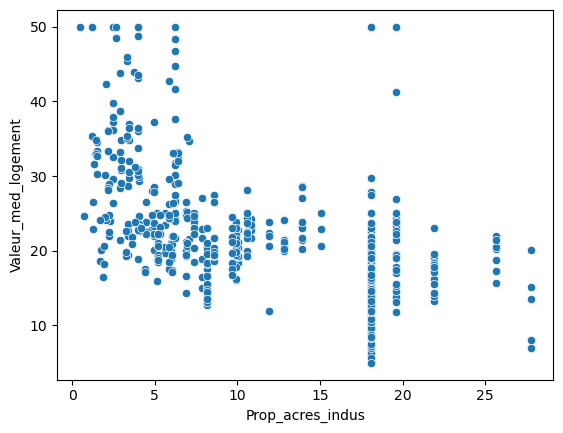

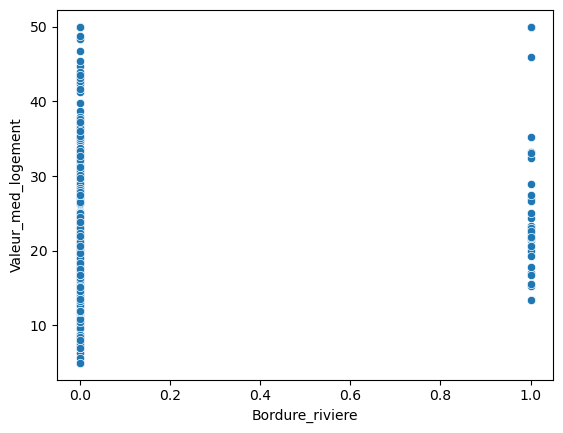

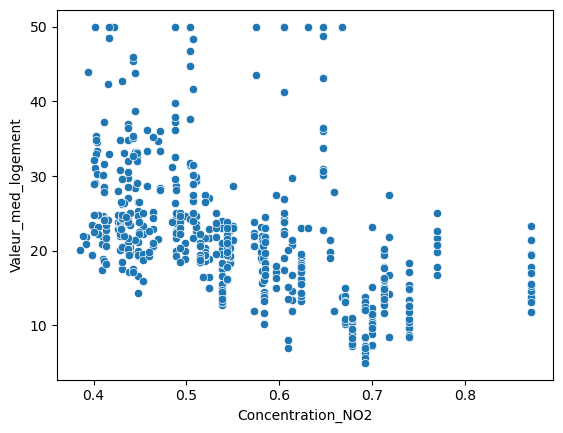

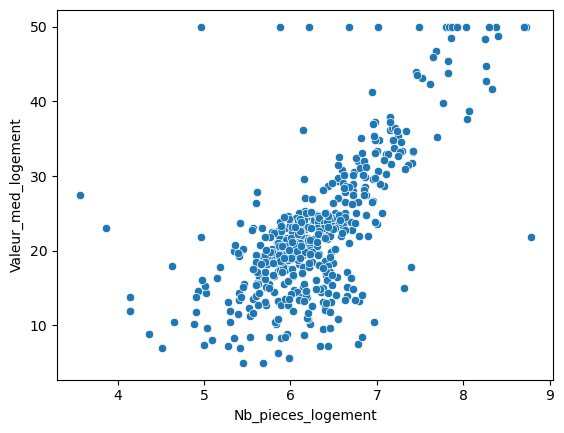

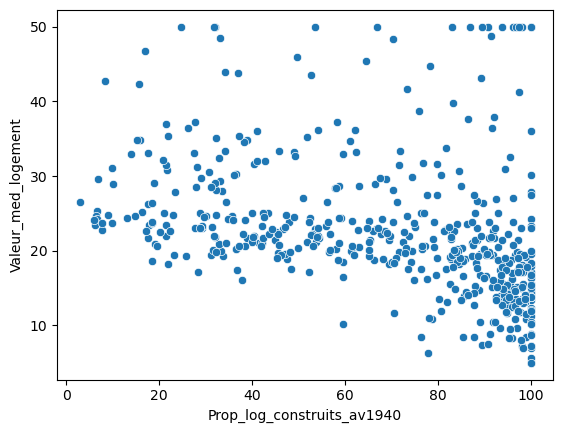

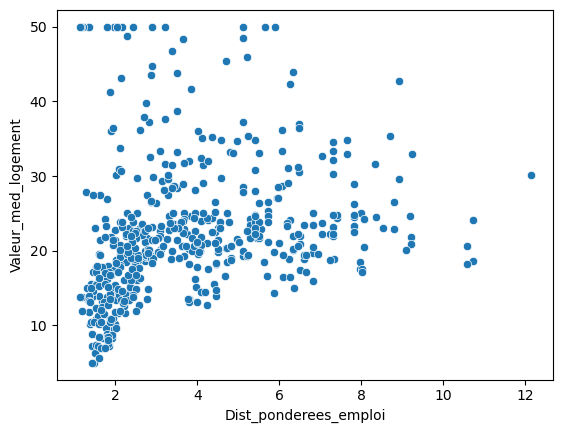

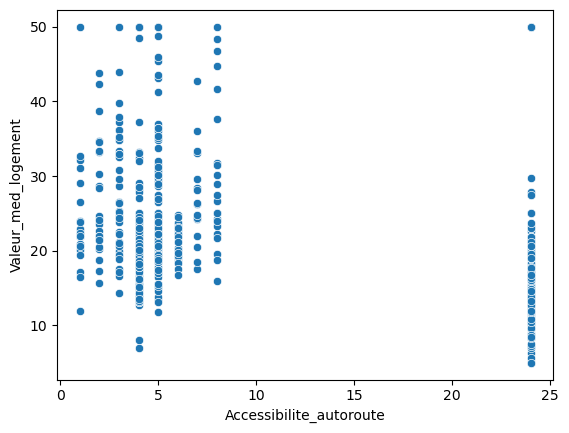

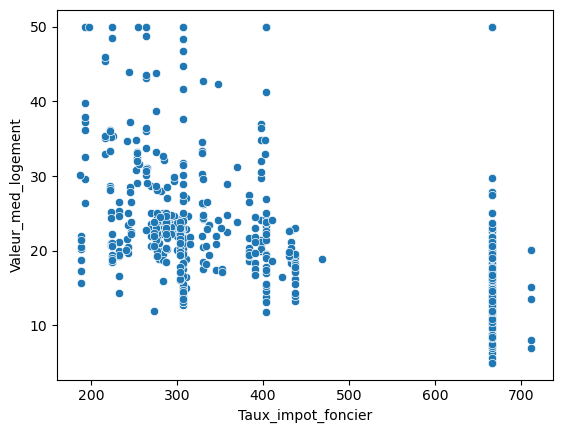

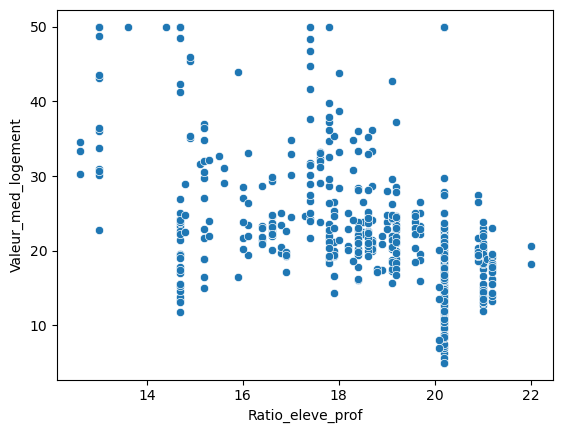

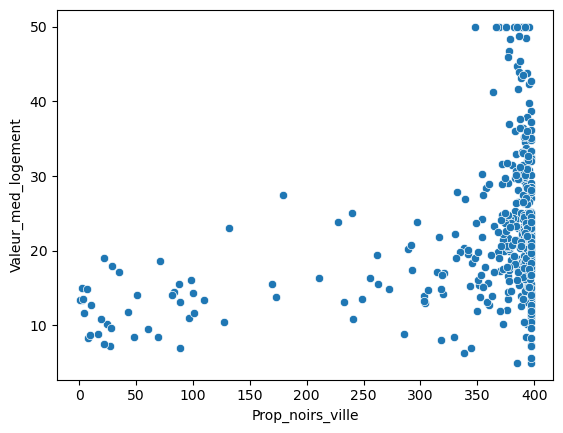

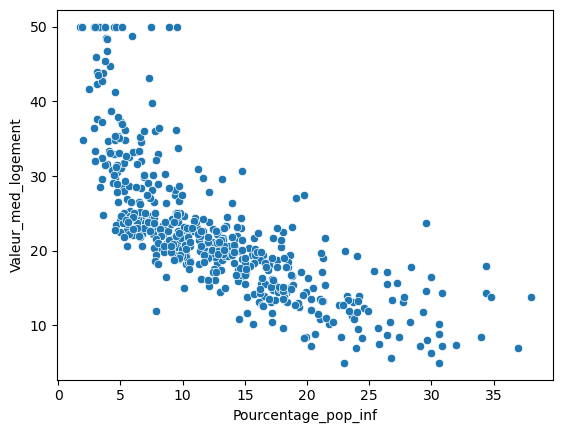

In [9]:
# Extraction des colonnes de variables explicatives
X = data.drop("Valeur_med_logement", axis=1)

# Affichage des nuages de points entre la variable à expliquer et toutes les variables explicatives avec seaborn
for col in X.columns:
    sns.scatterplot(x=X[col], y=data["Valeur_med_logement"])
    plt.show()

<AxesSubplot:>

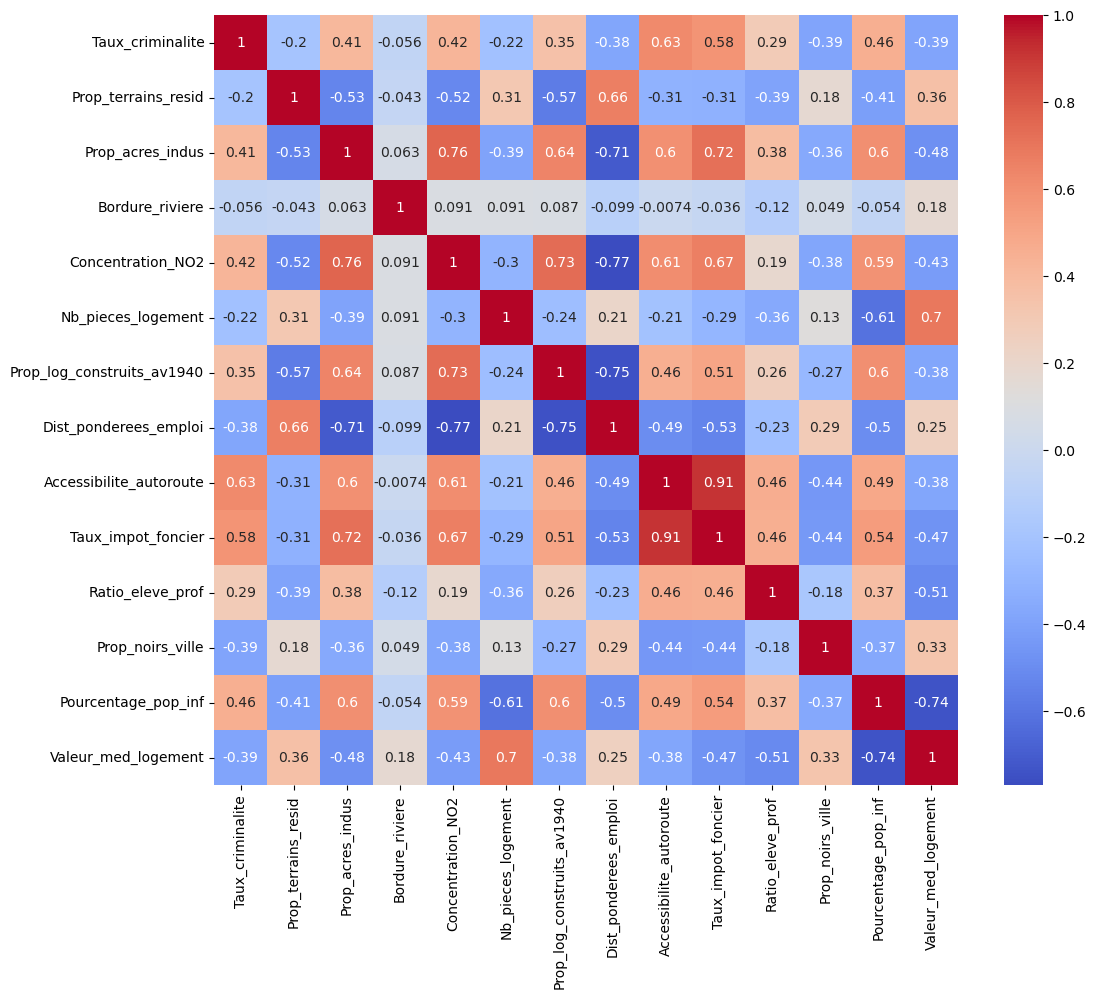

In [10]:
# Calcul de la matrice de corrélation
corr_matrix = data.corr()


plt.figure(figsize=(12, 10))
# Affichage de la matrice de corrélation sous forme de heatmap avec seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

In [11]:
# Extraction des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
corr_threshold = 0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) > corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt (Valeur_med_logement) :

['Nb_pieces_logement', 'Pourcentage_pop_inf', 'Valeur_med_logement']


In [12]:
# Extraction des variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt
corr_threshold = -0.6
corr_vars = corr_matrix[abs(corr_matrix["Valeur_med_logement"]) < corr_threshold].index.tolist()

# Affichage des variables ayant une corrélation supérieure à 0.6 avec la variable d'intérêt
print("Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :\n")
print(corr_vars)

Variables ayant une corrélation inférieure à -0.6 avec la variable d'intérêt (Valeur_med_logement) :

[]


In [13]:

# Extraction des couples de variables ayant une corrélation supérieure à 0.8
corr_threshold = 0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) > corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation supérieure à 0.8
print("Couples de variables ayant une corrélation supérieure à 0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation supérieure à 0.8 :

Accessibilite_autoroute - Taux_impot_foncier
Taux_impot_foncier - Accessibilite_autoroute


In [14]:

# Extraction des couples de variables ayant une corrélation inférieure à -0.8
corr_threshold = -0.8
corr_pairs = {}

for col in corr_matrix.columns:
    corr_pairs[col] = []
    corr_values = corr_matrix[abs(corr_matrix[col]) < corr_threshold][col].index.tolist()
    for pair in corr_values:
        if pair != col:
            corr_pairs[col].append(pair)

# Affichage des couples de variables ayant une corrélation inférieure à -0.8
print("Couples de variables ayant une corrélation inférieure à -0.8 :\n")
for col, pairs in corr_pairs.items():
    if len(pairs) > 0:
        for pair in pairs:
            print(col, "-", pair)

Couples de variables ayant une corrélation inférieure à -0.8 :



# Division en Train et en Test

In [15]:

# Diviser les données en ensembles d'apprentissage et de test

train, test = train_test_split(data, test_size=0.2, random_state=42)



## Sélection des features sur la base train

In [16]:
# Résumé statistique des variables
train.describe()

,Taux_criminalite,Prop_terrains_resid,Prop_acres_indus,Bordure_riviere,Concentration_NO2,Nb_pieces_logement,Prop_log_construits_av1940,Dist_ponderees_emploi,Accessibilite_autoroute,Taux_impot_foncier,Ratio_eleve_prof,Prop_noirs_ville,Pourcentage_pop_inf,Valeur_med_logement
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351,22.796535
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381,9.332147
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500,16.950000
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000,21.600000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500,26.400000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


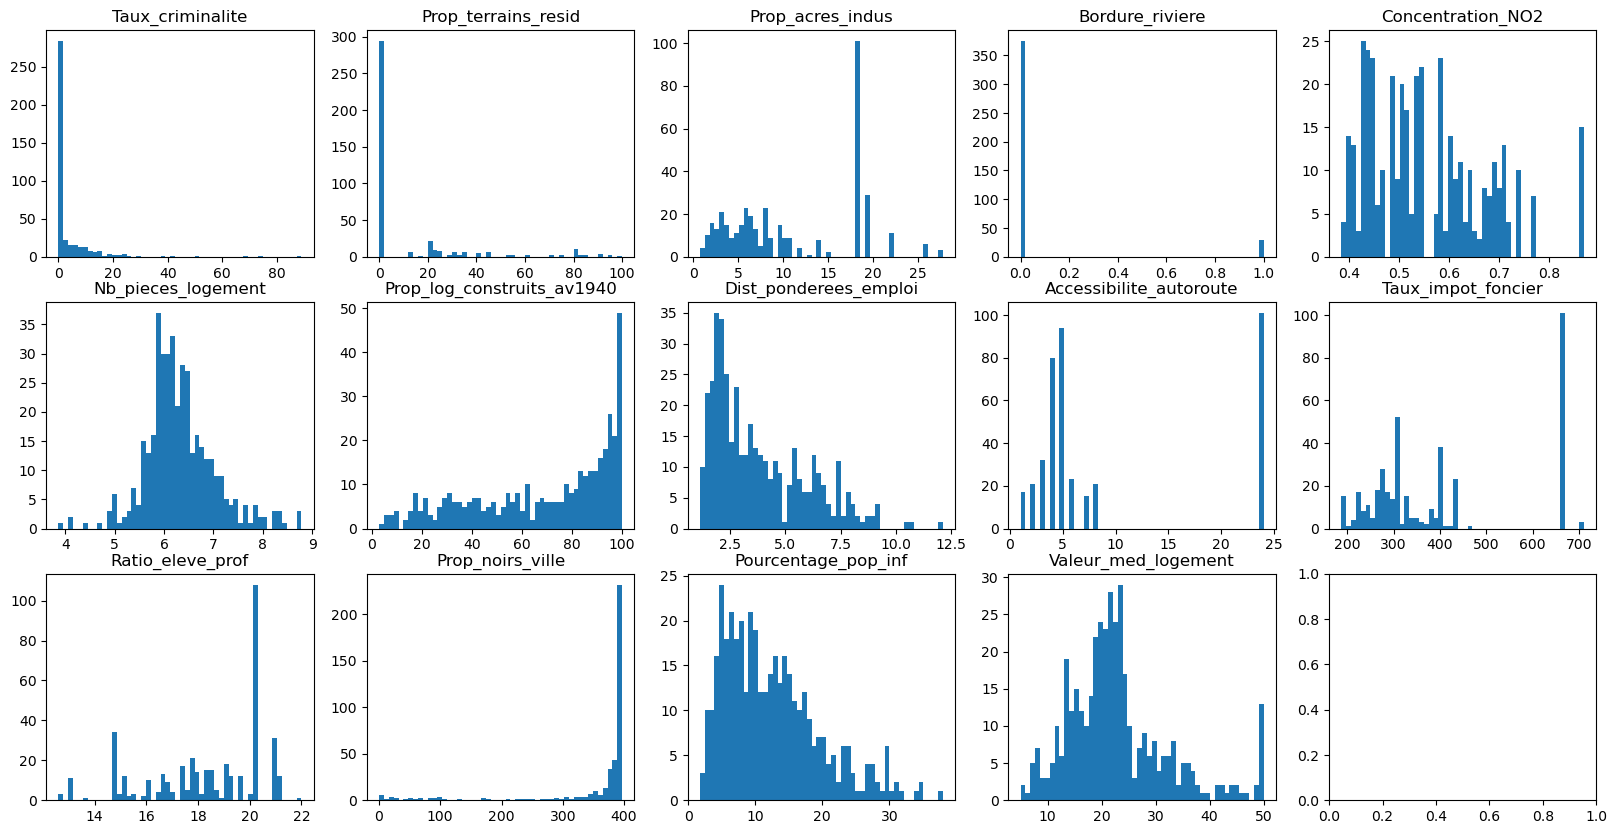

In [17]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(3, 5, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(train.columns):
    axs[i].hist(train[column], bins=50)
    axs[i].set_title(column)

plt.show()

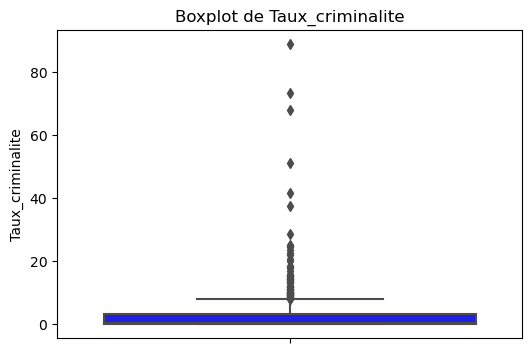

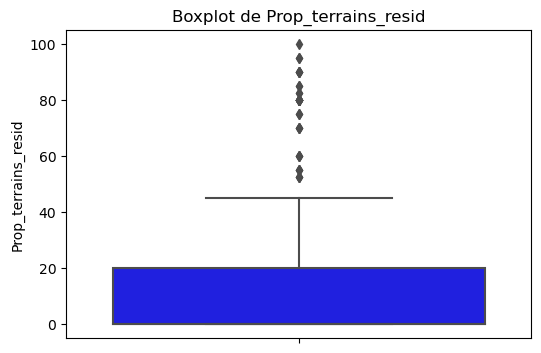

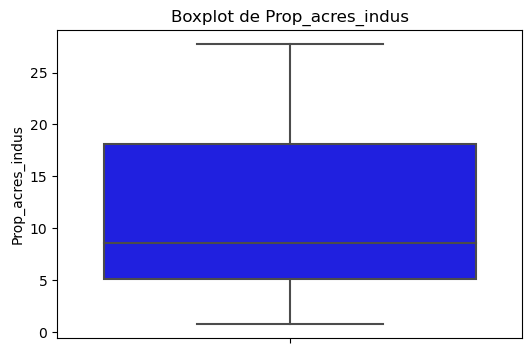

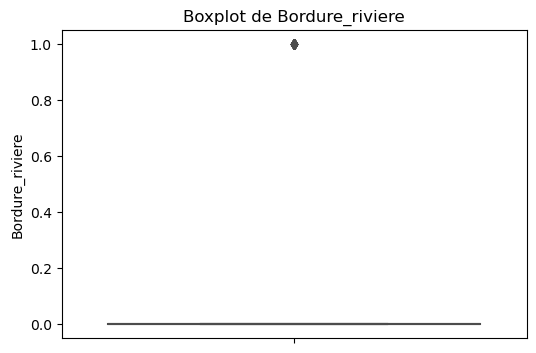

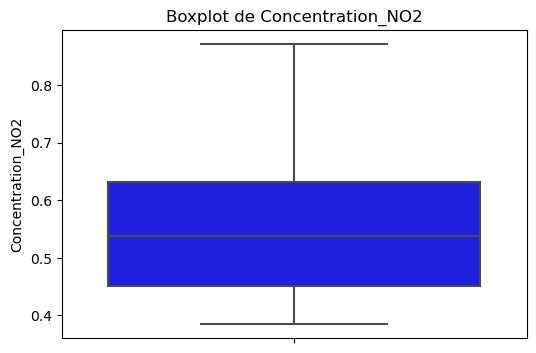

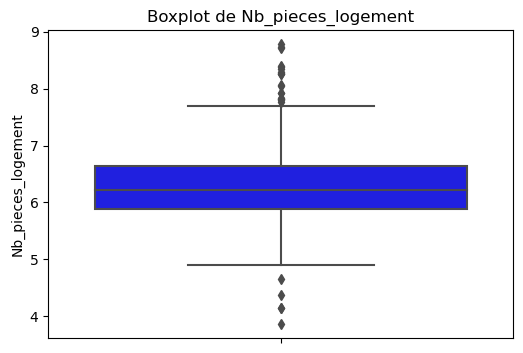

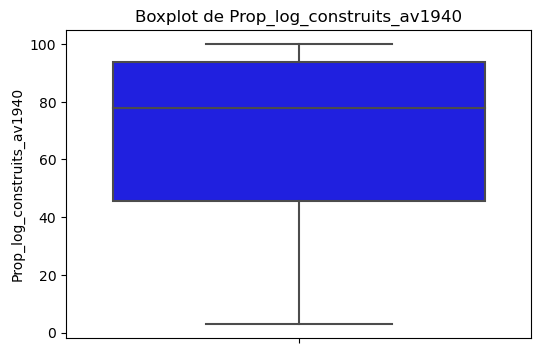

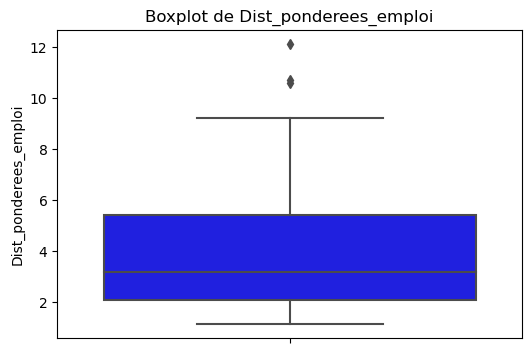

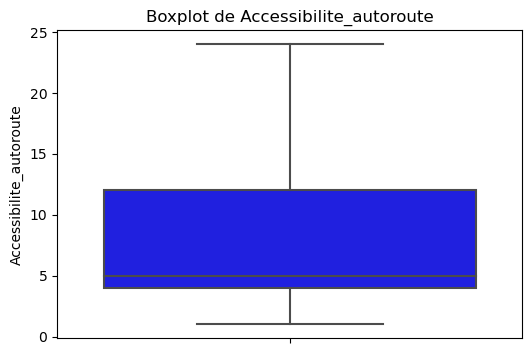

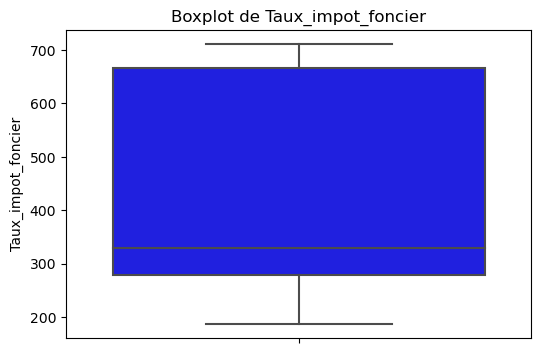

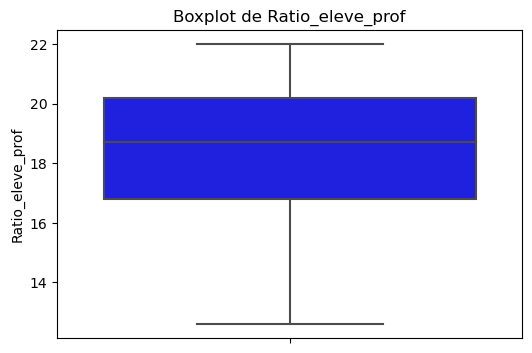

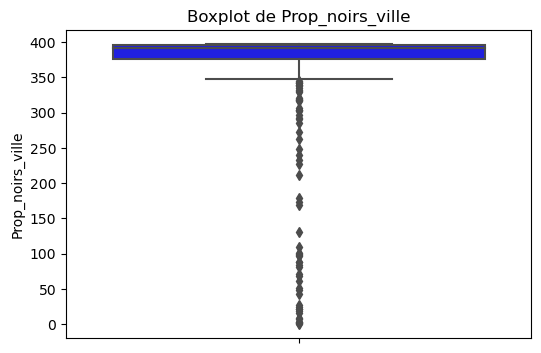

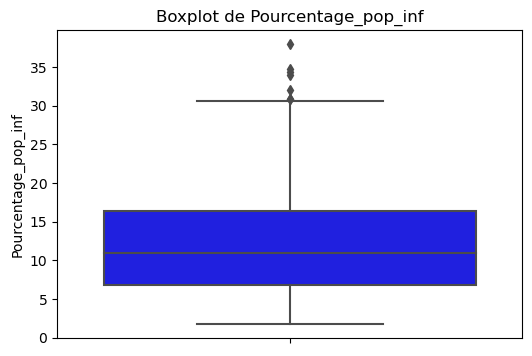

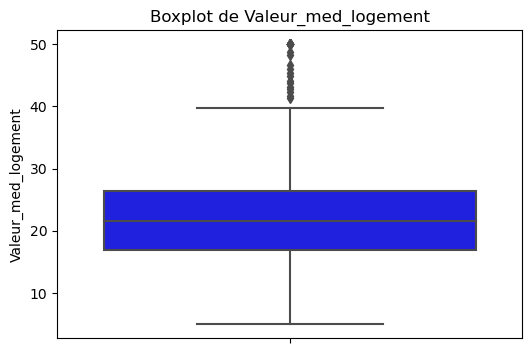

In [18]:

# Affichage des boxplots pour chaque variable numérique
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train, y=col, color="blue")
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
    plt.show()

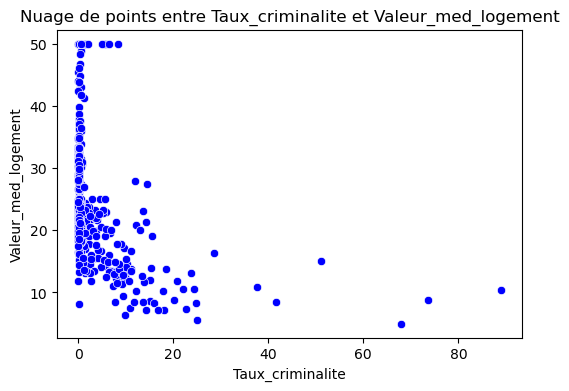

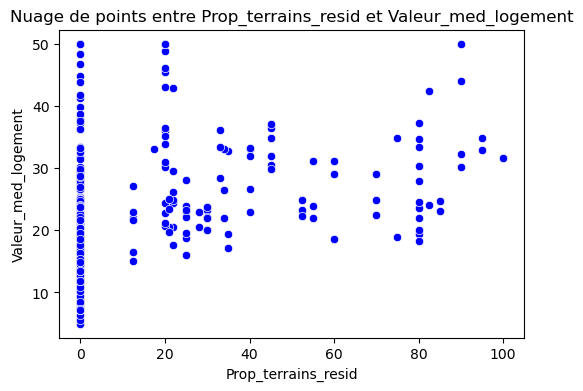

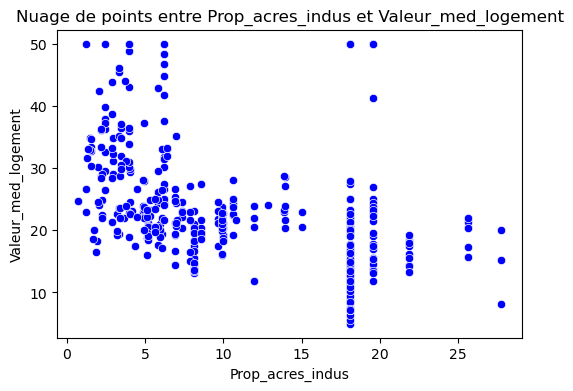

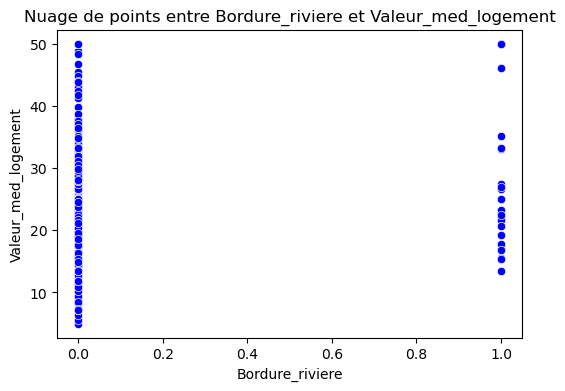

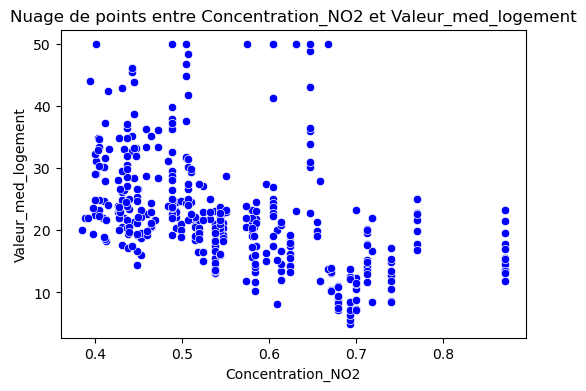

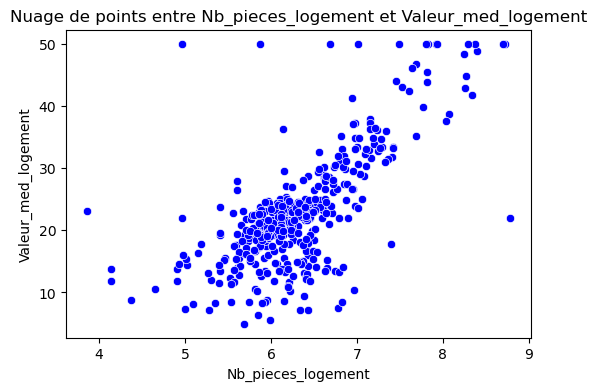

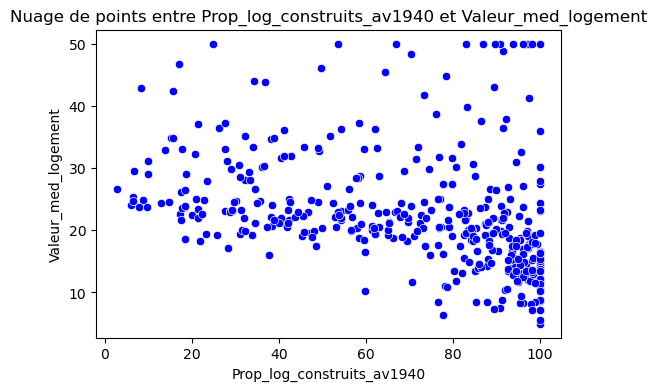

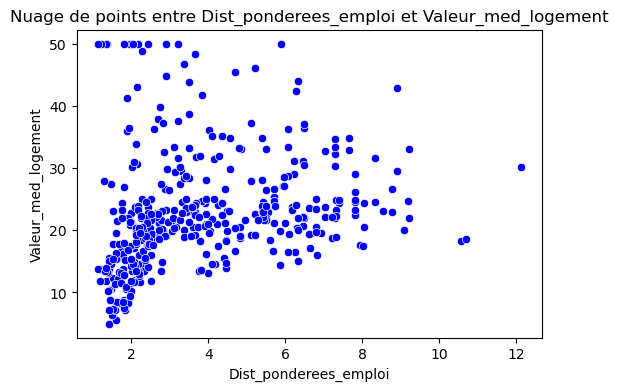

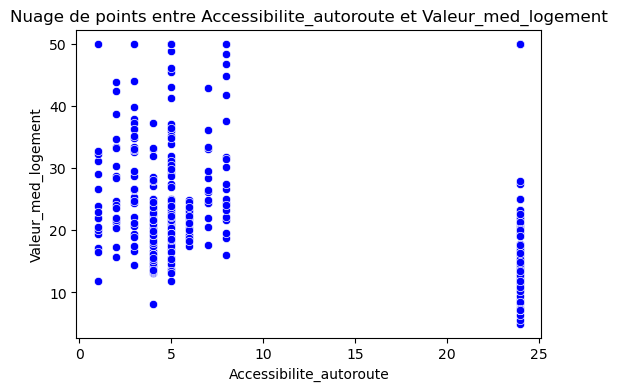

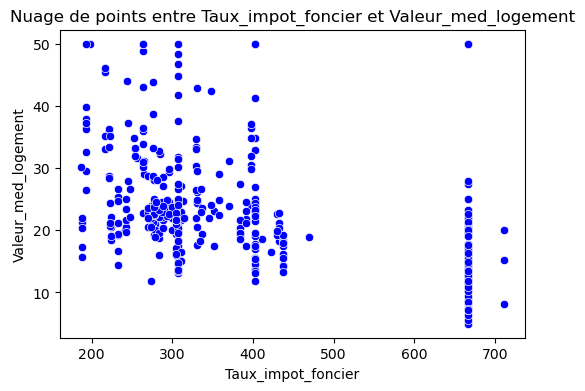

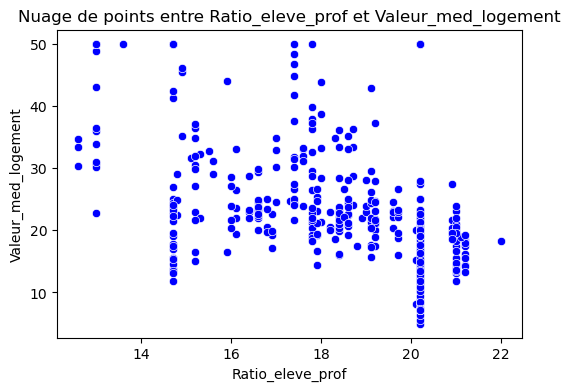

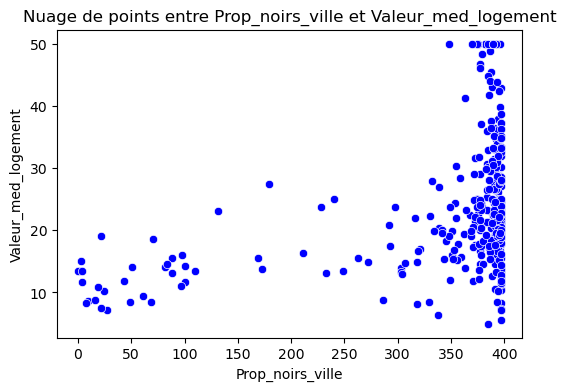

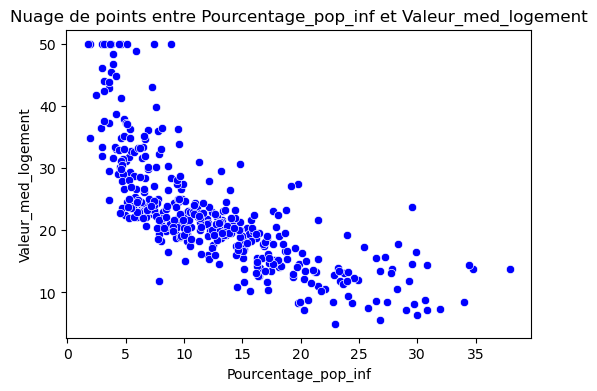

In [19]:
# Affichage des nuages de points entre la variable d'intérêt et toutes les autres variables
target_col = "Valeur_med_logement"
num_cols = list(train.select_dtypes(include=["float64", "int64"]).columns)
num_cols.remove(target_col)

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=train, x=col, y=target_col, color="blue")
    plt.title(f"Nuage de points entre {col} et {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.show()

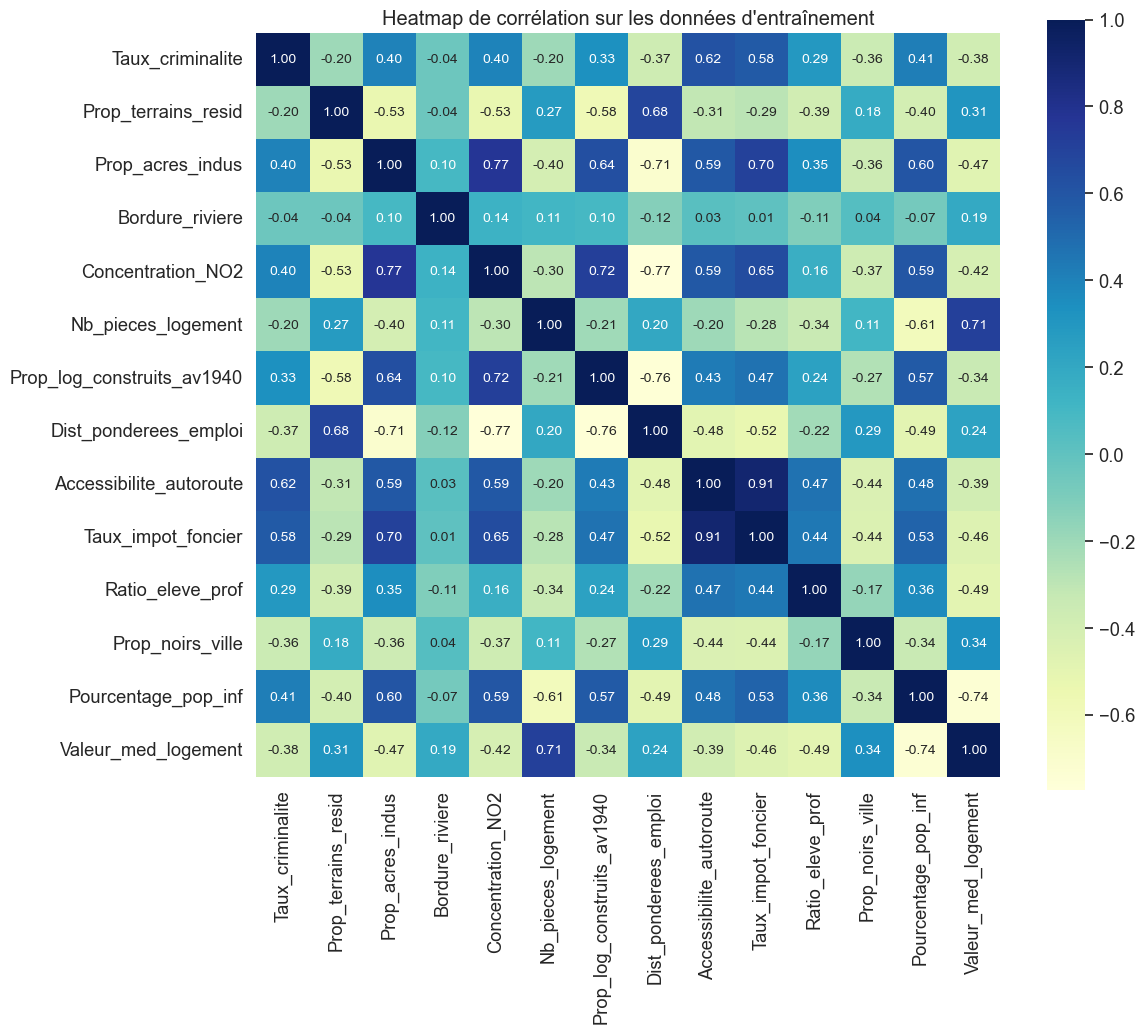

In [20]:
# Calcul de la matrice de corrélation sur les données d'entraînement
corr_matrix_train = train.corr()


sns.set(font_scale=1.2)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_train, cmap="YlGnBu", annot=True, annot_kws={"size": 10}, square=True, fmt=".2f")

# Affichage du graphique
import matplotlib.pyplot as plt

plt.title("Heatmap de corrélation sur les données d'entraînement")
plt.show()


### Selection des variables à partir de la ocrrélation de pearson

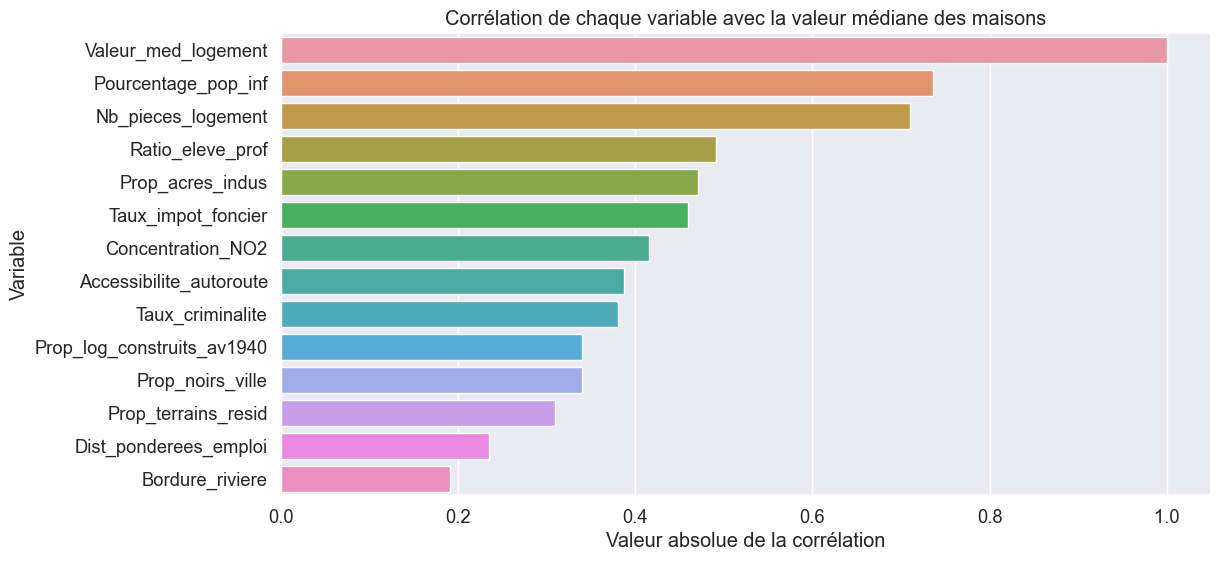

In [21]:

# Calcul de la corrélation entre chaque variable et la variable cible (en valeur absolue)
correlations = abs(train.corr()["Valeur_med_logement"]).sort_values(ascending=False)

# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()








# Modélisation sur la base train

In [22]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement", axis=1)
y_train = train["Valeur_med_logement"]


X_test = test.drop("Valeur_med_logement", axis=1)
y_test = test["Valeur_med_logement"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


In [23]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.743
1,Dependent Variable:,Valeur_med_logement,AIC:,2416.6443
2,Date:,2023-05-05 21:02,BIC:,2472.6641
3,No. Observations:,404,Log-Likelihood:,-1194.3
4,Df Model:,13,F-statistic:,90.43
5,Df Residuals:,390,Prob (F-statistic):,6.21e-109
6,R-squared:,0.751,Scale:,22.418


In [24]:
# Obtention des prédictions et des métriques d'évaluation
y_train_pred = lr_model.predict(sm.add_constant(X_train))
y_test_pred = lr_model.predict(sm.add_constant(X_test))
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


In [25]:
# Construction du tableau de résultats

df_metrics = pd.DataFrame({
    'Métrique': ['R2', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

print(df_metrics)



  Métrique      Train       Test
0       R2   0.750886   0.668759
1      MSE  21.641413  24.291119
2     RMSE   4.652033   4.928602


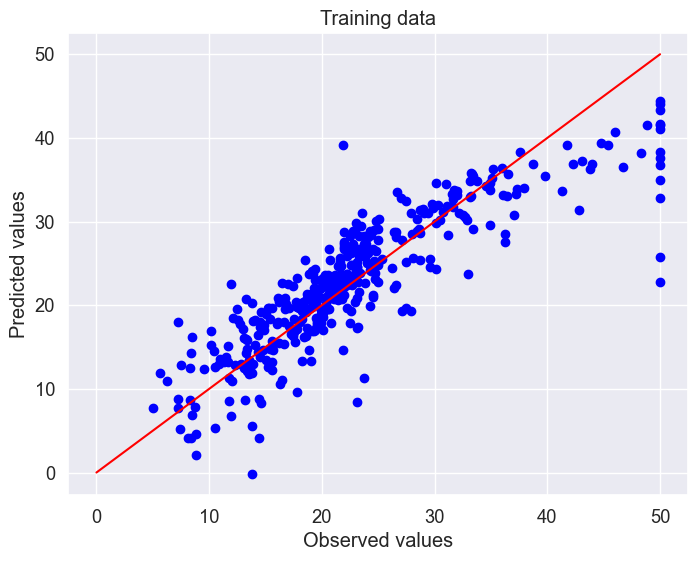

In [26]:

# Tracer les valeurs observées en fonction des valeurs prédites sur les données d'entraînement
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue')
plt.xlabel('Observed values')
plt.ylabel('Predicted values')
plt.title('Training data')
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()



## Vérification des hypothèses du modèles

### Vérification de l'homoscédasticité

/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


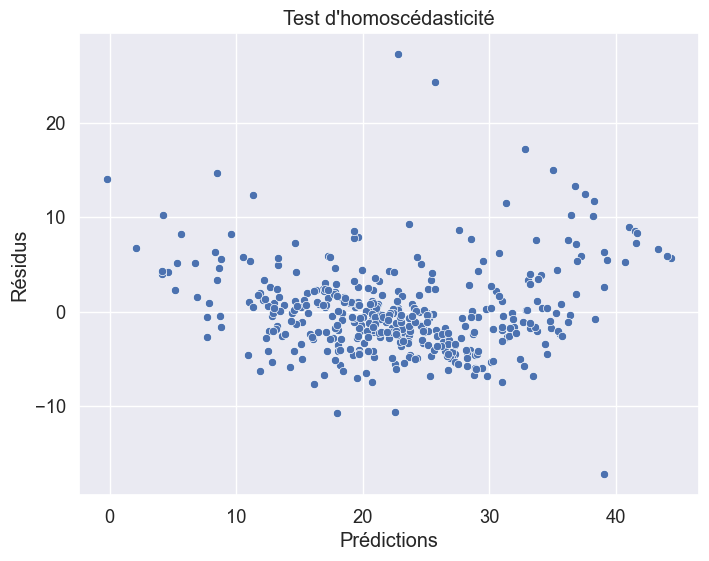

In [27]:
# Test d'homoscédasticité
y_train_pred = lr_model.predict(sm.add_constant(X_train))
residuals = y_train - y_train_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(y_train_pred, residuals)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [28]:
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model.resid, lr_model.model.exog)
print("Test de Breusch-Pagan : statistique = %f, p-value = %f" % (bp_test[0], bp_test[1]))

Test de Breusch-Pagan : statistique = 59.189087, p-value = 0.000000


### Vérification de la multicolinéarité

In [29]:
# Test de multicollinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

    VIF Factor                    features
0     1.987996            Taux_criminalite
1     3.075814         Prop_terrains_resid
2    13.741418            Prop_acres_indus
3     1.181392             Bordure_riviere
4    74.807051           Concentration_NO2
5    77.536575          Nb_pieces_logement
6    20.885660  Prop_log_construits_av1940
7    15.299778       Dist_ponderees_emploi
8    15.204351     Accessibilite_autoroute
9    60.960907          Taux_impot_foncier
10   81.228153            Ratio_eleve_prof
11   19.703235            Prop_noirs_ville
12   10.597205         Pourcentage_pop_inf


#### Tester d'autres modèles

In [30]:
train.columns

Index(['Taux_criminalite', 'Prop_terrains_resid', 'Prop_acres_indus',
       'Bordure_riviere', 'Concentration_NO2', 'Nb_pieces_logement',
       'Prop_log_construits_av1940', 'Dist_ponderees_emploi',
       'Accessibilite_autoroute', 'Taux_impot_foncier', 'Ratio_eleve_prof',
       'Prop_noirs_ville', 'Pourcentage_pop_inf', 'Valeur_med_logement'],
      dtype='object')

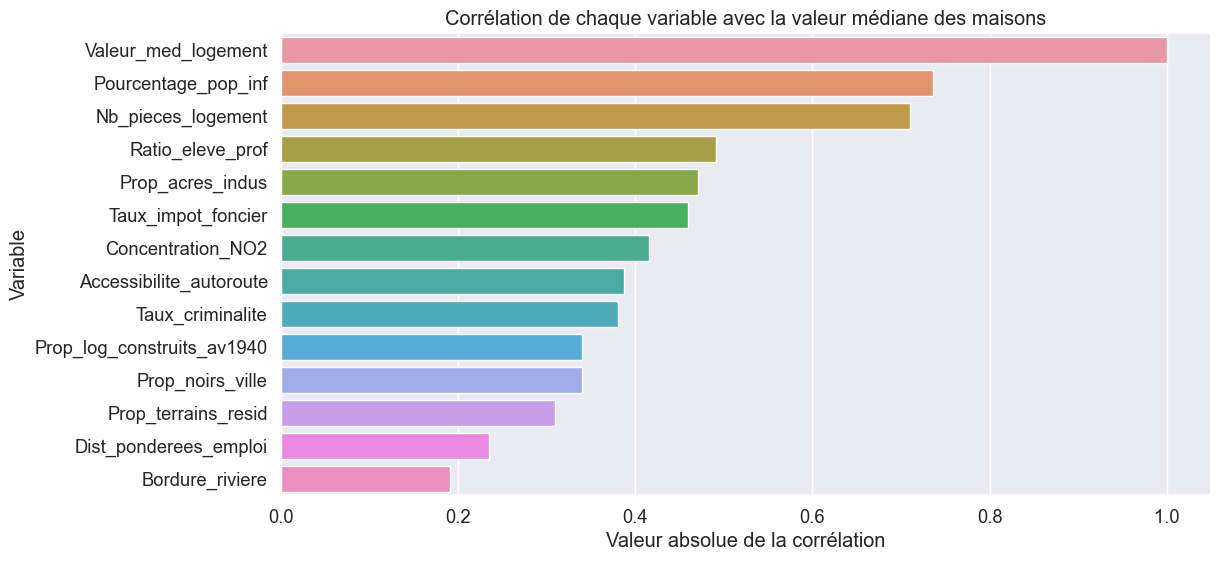

In [31]:
# Représentation graphique des corrélations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Variable")
plt.title("Corrélation de chaque variable avec la valeur médiane des maisons")
plt.show()




In [32]:
new_selection=['Taux_criminalite', 'Prop_terrains_resid','Bordure_riviere','Pourcentage_pop_inf','Nb_pieces_logement']
train_selectedb = train[new_selection]
train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]
train_selectedb

/var/folders/37/trhmrbz96fxbg7shtyrl360r0000gn/T/ipykernel_45700/3352992716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_selectedb["Valeur_med_logement"] = train["Valeur_med_logement"]


,Taux_criminalite,Prop_terrains_resid,Bordure_riviere,Pourcentage_pop_inf,Nb_pieces_logement,Valeur_med_logement
478,15.02340,0.0,0,24.91,5.304,12.0
16,0.62739,0.0,0,8.47,5.834,19.9
333,0.03466,35.0,0,7.83,6.031,19.4
424,7.05042,0.0,0,23.29,6.103,13.4
20,0.72580,0.0,0,11.28,5.727,18.2
...,...,...,...,...,...,...
107,0.17120,0.0,0,18.66,5.836,19.5
271,0.29916,20.0,0,13.00,5.856,21.1
349,0.01501,80.0,0,5.99,6.635,24.5
436,11.16040,0.0,0,23.27,6.629,13.4


In [33]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train_selectedb.drop("Valeur_med_logement", axis=1)
y_train = train_selectedb["Valeur_med_logement"]

# Fit du modèle linéaire
lr_modelb = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_modelb.summary2().tables[1]
results_table


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.456849,3.443081,-1.294436,1.962652e-01,-11.225747,2.312049
Taux_criminalite,-0.120726,0.033224,-3.633660,3.160255e-04,-0.186042,-0.055409
Prop_terrains_resid,0.003962,0.012645,0.313352,7.541775e-01,-0.020897,0.028821
Bordure_riviere,3.973362,1.044607,3.803690,1.649393e-04,1.919724,6.027000
Pourcentage_pop_inf,-0.556914,0.053248,-10.458859,8.813015e-23,-0.661596,-0.452231
Nb_pieces_logement,5.430066,0.480523,11.300332,7.177379e-26,4.485386,6.374746


In [34]:
lr_modelb.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.669
1,Dependent Variable:,Valeur_med_logement,AIC:,2509.9140
2,Date:,2023-05-05 21:02,BIC:,2533.9225
3,No. Observations:,404,Log-Likelihood:,-1249.0
4,Df Model:,5,F-statistic:,164.2
5,Df Residuals:,398,Prob (F-statistic):,2.14e-94
6,R-squared:,0.674,Scale:,28.790


In [35]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
print(vif)

   VIF Factor             features
0    1.404903     Taux_criminalite
1    1.496354  Prop_terrains_resid
2    1.096236      Bordure_riviere
3    4.377823  Pourcentage_pop_inf
4    4.809735   Nb_pieces_logement


In [36]:
import statsmodels.api as sm
# Séparation des variables prédictives et de la variable cible
X_train = train.drop("Valeur_med_logement", axis=1)
y_train = train["Valeur_med_logement"]

# Fit du modèle linéaire
lr_model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Obtention du tableau de résultats
results_table = lr_model.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,30.246751,5.676806,5.328128,1.681610e-07,19.085779,41.407723
Taux_criminalite,-0.113056,0.034784,-3.250225,1.253280e-03,-0.181444,-0.044668
Prop_terrains_resid,0.030110,0.015996,1.882358,6.053164e-02,-0.001339,0.061560
Prop_acres_indus,0.040381,0.067365,0.599432,5.492330e-01,-0.092063,0.172825
Bordure_riviere,2.784438,0.955688,2.913544,3.779273e-03,0.905494,4.663382
Concentration_NO2,-17.202633,4.236119,-4.060942,5.909342e-05,-25.531120,-8.874147
Nb_pieces_logement,4.438835,0.463980,9.566874,1.285223e-19,3.526621,5.351050
Prop_log_construits_av1940,-0.006296,0.014568,-0.432204,6.658322e-01,-0.034938,0.022345
Dist_ponderees_emploi,-1.447865,0.225950,-6.407891,4.258552e-10,-1.892099,-1.003632
Accessibilite_autoroute,0.262430,0.075986,3.453638,6.137380e-04,0.113035,0.411824


### Vérification de la normalité

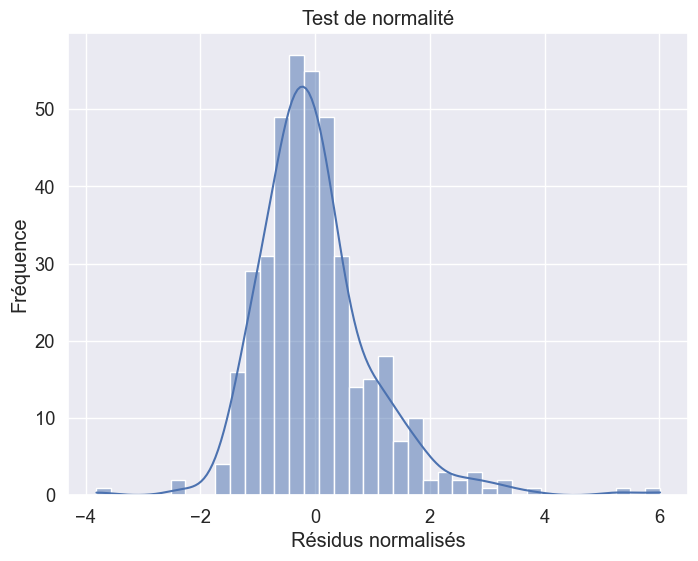

In [37]:
# Test de normalité
resid_norm = lr_model.get_influence().resid_studentized_internal
plt.figure(figsize=(8, 6))
sns.histplot(resid_norm, kde=True)
plt.title('Test de normalité')
plt.xlabel('Résidus normalisés')
plt.ylabel('Fréquence')
plt.show()


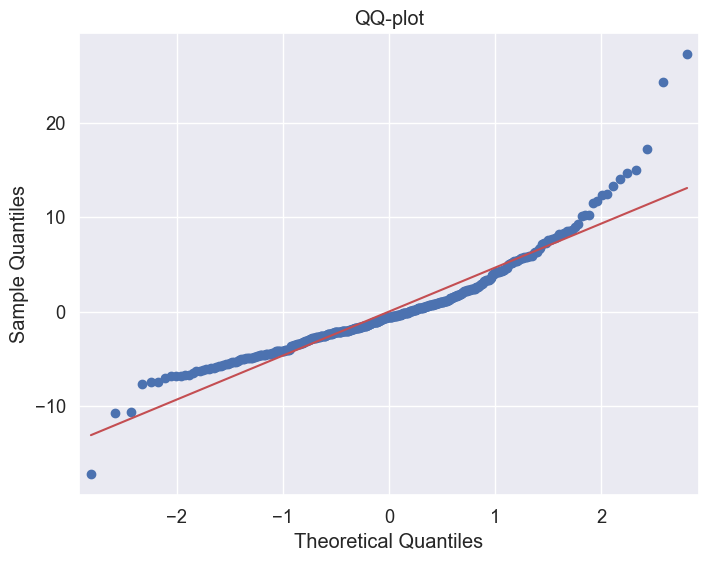

In [38]:
# QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

In [39]:
import scipy.stats as stats

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(df_normality)

    Test de normalité  Statistique p-value
0        Shapiro-Wilk     0.911794     0.0
1    Anderson-Darling     7.412841     N/A
2  Kolmogorov-Smirnov     0.347848     0.0


### Vérification de l'autocorrélation

In [40]:
from statsmodels.stats.stattools import durbin_watson
# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-Watson : statistique = %f" % dw_test)

Test de Durbin-Watson : statistique = 2.114123


### Moyenne des termes d'erreur

In [41]:
residuals.mean()

-1.4166885486503978e-14

# Pénalisation sur un modèle de régression

## Régression Ridge

## Régression Ridge

La régression Ridge est une technique de régression linéaire régularisée qui utilise une pénalité de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la régression dans des problèmes de haute dimensionnalité.

### Avantages de la régression Ridge

- La régression Ridge peut aider à réduire la variance et à améliorer la stabilité des modèles, en limitant la croissance des coefficients des variables.
- La régression Ridge est moins sensible aux valeurs aberrantes et aux données manquantes que la régression Lasso.

### Inconvénients de la régression Ridge

- La régression Ridge ne peut pas sélectionner de variables, elle peut donc inclure des variables non pertinentes dans le modèle.
- La régression Ridge peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Ridge

La fonction de coût de la régression Ridge est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_2^2` est la norme L2 des coefficients.

La régularisation L2 introduit une pénalité qui force tous les coefficients à rester petits, ce qui peut réduire la variance du modèle.


In [84]:
from sklearn.linear_model import Lasso, LassoCV,RidgeCV,Ridge,ElasticNet,ElasticNetCV
from sklearn.model_selection import train_test_split,cross_val_score

# Créer et ajuster le modèle RidgeCV
alphas = np.linspace(0.01, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
ridge_cv = RidgeCV(alphas=alphas, cv=7) # cv est le nombre de plis (folds) pour la validation croisée
ridge_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = ridge_cv.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.01


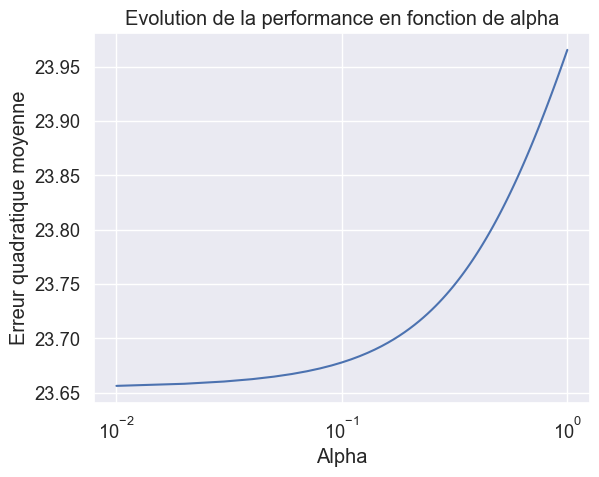

In [79]:
mse_scores = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

## Régression LASSO

La régression Lasso est une technique de régression linéaire régularisée qui utilise une pénalité de L1 pour réduire les coefficients des variables non pertinentes à zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Lasso

- La régression Lasso peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.
- La régression Lasso peut aider à réduire la dimensionnalité des données, en éliminant les variables qui ont peu d'impact sur la prédiction.

### Inconvénients de la régression Lasso

- La régression Lasso peut être sensible aux valeurs aberrantes (outliers) et aux données manquantes, ce qui peut entraîner des coefficients mal estimés.
- La régression Lasso peut ne pas fonctionner correctement si les variables sont fortement corrélées, car elle peut avoir des difficultés à sélectionner les variables les plus importantes.

### Fonction de coût de la régression Lasso

La fonction de coût de la régression Lasso est définie comme :
    $$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha ||w||_1 \right) $$
    où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation et `||w||_1` est la norme L1 des coefficients.

La régularisation L1 introduit une pénalité qui force certains coefficients à devenir exactement égaux à zéro, ce qui peut conduire à un modèle parcimonieux et plus interprétable.






In [108]:
from sklearn.linear_model import LassoCV

# Créer et ajuster le modèle LassoCV
alphas = [0.001, 1.0, 10.0, 100.0]
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)

# Obtenir le meilleur paramètre alpha
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

Best alpha: 0.001


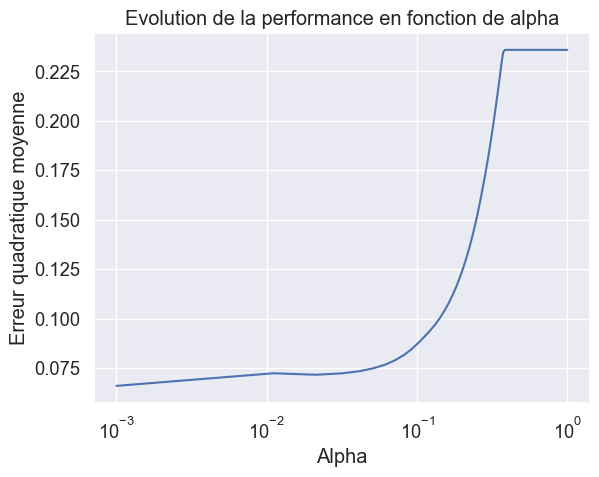

In [110]:

# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.linspace(0.001, 1, 100) # Liste des valeurs possibles pour le paramètre alpha
mse_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores.append(mse_score)

plt.plot(alphas, mse_scores)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de alpha')
plt.show()

## Régression Elastic Net

La régression Elastic Net est une technique de régression linéaire régularisée qui utilise une combinaison des pénalités de L1 et de L2 pour réduire les coefficients des variables non pertinentes proches de zéro. Elle est souvent utilisée pour la sélection de variables et la réduction de dimensionnalité dans les problèmes de régression.

### Avantages de la régression Elastic Net

- La régression Elastic Net peut aider à réduire la variance et à améliorer la stabilité des modèles, en combinant les avantages de la régression Lasso et de la régression Ridge.
- La régression Elastic Net peut être utilisée pour sélectionner les variables les plus importantes dans un modèle de régression, ce qui peut améliorer la compréhension des relations entre les variables.

### Inconvénients de la régression Elastic Net

- La régression Elastic Net peut être plus complexe à mettre en œuvre que la régression Lasso ou Ridge, car elle nécessite de déterminer deux paramètres de régularisation.
- La régression Elastic Net peut avoir des difficultés à fonctionner correctement si les variables sont fortement corrélées.

### Fonction de coût de la régression Elastic Net

La fonction de coût de la régression Elastic Net est définie comme :

$$ J(w) = \frac{1}{2m} \left( ||Xw - y||^2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2^2 \right) $$

où `J(w)` est la fonction de coût, `w` est le vecteur des coefficients de régression, `X` est la matrice de conception (ou matrice des variables explicatives), `y` est le vecteur des valeurs cibles, `m` est le nombre d'échantillons, `||Xw - y||^2` est l'erreur de prédiction, `alpha` est le coefficient de régularisation, `rho` est le paramètre d'élasticité et `||w||_1` et `||w||_2^2` sont les normes L1 et L2 des coefficients.

La régularisation Elastic Net introduit une pénalité qui force à la fois la sparsité des coefficients et leur magnitude globale, ce qui peut conduire à des modèles plus parcimonieux et plus stables.


In [82]:

# Créer un modèle de régression ElasticNet avec validation croisée de ElasticNetCV
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster le modèle aux données
model.fit(X_train, y_train)

# Trouver le meilleur alpha et le meilleur l1_ratio
best_alpha = model.alpha_
best_l1_ratio = model.l1_ratio_

# Imprimer le meilleur alpha et le meilleur l1_ratio
print("Meilleur alpha:", best_alpha)
print("Meilleur l1_ratio:", best_l1_ratio)


Meilleur alpha: 1e-05
Meilleur l1_ratio: 1.0


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.463e-01, tolerance: 7.565e-03
  model = cd_fast.enet_coordinate_descent(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.778e-01, tolerance: 7.496e-03
  model = cd_fast.enet_coordinate_descent(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

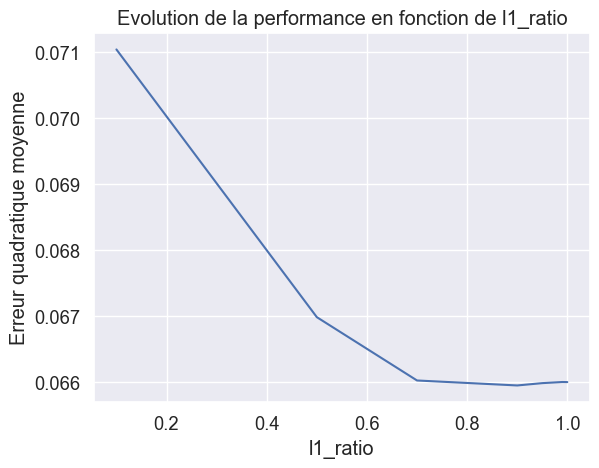

In [111]:
# Tracer le graphique d'évolution des performances en fonction de l'alpha
alphas = np.logspace(-5, 5, 11)
mse_scores = {}
for l1_ratio in [.1, .5, .7, .9, .95, .99, 1]:
    model = ElasticNet(alpha=best_alpha, l1_ratio=l1_ratio)
    mse_score = np.mean(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    mse_scores[l1_ratio] = mse_score

plt.plot(list(mse_scores.keys()), list(mse_scores.values()))
plt.xlabel('l1_ratio')
plt.ylabel('Erreur quadratique moyenne')
plt.title('Evolution de la performance en fonction de l1_ratio')
plt.show()

# Résumé

In [112]:

# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)

# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)

# Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
enet_train_pred = enet_model.predict(X_train)
enet_test_pred = enet_model.predict(X_test)

# Calculer le R2 et le RMSE pour les données d'apprentissage et de test
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))
lasso_train_r2 = r2_score(y_train, lasso_train_pred)
lasso_test_r2 = r2_score(y_test, lasso_test_pred)
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_test_pred))
enet_train_r2 = r2_score(y_train, enet_train_pred)
enet_test_r2 = r2_score(y_test, enet_test_pred)
enet_train_rmse = np.sqrt(mean_squared_error(y_train, enet_train_pred))
enet_test_rmse = np.sqrt(mean_squared_error(y_test, enet_test_pred))

/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06466134767269338, tolerance: 0.007564779874213836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.954340880775915, tolerance: 0.007564779874213836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8984087865812445, tolerance: 0.007495911949685531
  model = cd_fast.enet_coordinate_descent_gram(
/

In [90]:
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
        'R2 sur base train': [ridge_train_r2, lasso_train_r2, enet_train_r2],
'R2 sur base test': [ridge_test_r2, lasso_test_r2, enet_test_r2],
'RMSE sur base train': [ridge_train_rmse, lasso_train_rmse, enet_train_rmse],
'RMSE sur base test': [ridge_test_rmse, lasso_test_rmse, enet_test_rmse]}

df = pd.DataFrame(data)
df

,Modèle,R2 sur base train,R2 sur base test,RMSE sur base train,RMSE sur base test
0,Ridge,0.750886,0.668759,4.652033,4.928602
1,Lasso,0.750886,0.668760,4.652033,4.928599
2,ElasticNet,0.750886,0.668760,4.652033,4.928599


# Pénalisation modèle de classification

In [91]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC


In [92]:
# Charger le jeu de données breast cancer
data = load_breast_cancer()

# Séparer les caractéristiques et les étiquettes
X = data.data
y = data.target

# Normaliser les caractéristiques
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
# Séparer les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [94]:
# Créer des modèles de régression Ridge, Lasso et ElasticNet avec validation croisée
ridge_model = RidgeCV(alphas=np.logspace(-5, 5, 11), cv=5)
lasso_model = LassoCV(alphas=np.logspace(-5, 5, 11), cv=5)
enet_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=np.logspace(-5, 5, 11), cv=5)


In [95]:
# Ajuster les modèles aux données d'apprentissage
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
enet_model.fit(X_train, y_train)


/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06466134767269338, tolerance: 0.007564779874213836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.954340880775915, tolerance: 0.007564779874213836
  model = cd_fast.enet_coordinate_descent_gram(
/Users/natachanjongwayepnga/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8984087865812445, tolerance: 0.007495911949685531
  model = cd_fast.enet_coordinate_descent_gram(
/

ElasticNetCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1])

In [96]:
# Prédire les valeurs pour les données d'apprentissage et de test
ridge_train_pred = ridge_model.predict(X_train)
ridge_test_pred = ridge_model.predict(X_test)
lasso_train_pred = lasso_model.predict(X_train)
lasso_test_pred = lasso_model.predict(X_test)
enet_train_pred = enet_model.predict(X_train)
enet_test_pred = enet_model.predict(X_test)


In [97]:
# Convertir les prédictions en classes (0 ou 1) pour les modèles de classification
ridge_train_pred = np.where(ridge_train_pred >= 0.5, 1, 0)
ridge_test_pred = np.where(ridge_test_pred >= 0.5, 1, 0)
lasso_train_pred = np.where(lasso_train_pred >= 0.5, 1, 0)
lasso_test_pred = np.where(lasso_test_pred >= 0.5, 1, 0)
enet_train_pred = np.where(enet_train_pred >= 0.5, 1, 0)
enet_test_pred = np.where(enet_test_pred >= 0.5, 1, 0)

In [99]:
# Calculer l'exactitude, l'aire sous la courbe ROC et la matrice de confusion pour les données d'apprentissage et de test
ridge_train_acc = accuracy_score(y_train, ridge_train_pred)
ridge_test_acc = accuracy_score(y_test, ridge_test_pred)
ridge_train_auc = roc_auc_score(y_train, ridge_train_pred)
ridge_test_auc = roc_auc_score(y_test, ridge_test_pred)
ridge_train_cm = confusion_matrix(y_train, ridge_train_pred)
ridge_test_cm = confusion_matrix(y_test, ridge_test_pred)
lasso_train_acc = accuracy_score(y_train, lasso_train_pred)
lasso_test_acc = accuracy_score(y_test, lasso_test_pred)
lasso_train_auc = roc_auc_score(y_train, lasso_train_pred)
lasso_test_auc = roc_auc_score(y_test, lasso_test_pred)
lasso_train_cm = confusion_matrix(y_train, lasso_train_pred)
lasso_test_cm = confusion_matrix(y_test, lasso_test_pred)
enet_train_acc = accuracy_score(y_train, enet_train_pred)
enet_test_acc = accuracy_score(y_test, enet_test_pred)
enet_train_auc = roc_auc_score(y_train, enet_train_pred)
enet_test_auc = roc_auc_score(y_test, enet_test_pred)
enet_train_cm = confusion_matrix(y_train, enet_train_pred)
enet_test_cm = confusion_matrix(y_test, enet_test_pred)

In [100]:
data = {'Modèle': ['Ridge', 'Lasso', 'ElasticNet'],
'Exactitude sur base train': [ridge_train_acc, lasso_train_acc, enet_train_acc],
'Exactitude sur base test': [ridge_test_acc, lasso_test_acc, enet_test_acc],
'AUC-ROC sur base train': [ridge_train_auc, lasso_train_auc, enet_train_auc],
'AUC-ROC sur base test': [ridge_test_auc, lasso_test_auc, enet_test_auc],
'Matrice de confusion sur base train': [ridge_train_cm, lasso_train_cm, enet_train_cm],
'Matrice de confusion sur base test': [ridge_test_cm, lasso_test_cm, enet_test_cm]}

In [101]:
df = pd.DataFrame(data)
df

,Modèle,Exactitude sur base train,Exactitude sur base test,AUC-ROC sur base train,AUC-ROC sur base test,Matrice de confusion sur base train,Matrice de confusion sur base test
0,Ridge,0.969849,0.970760,0.961079,0.963624,"[[138, 11], [1, 248]]","[[59, 4], [1, 107]]"
1,Lasso,0.972362,0.964912,0.963087,0.955688,"[[138, 11], [0, 249]]","[[58, 5], [1, 107]]"
2,ElasticNet,0.967337,0.964912,0.957724,0.955688,"[[137, 12], [1, 248]]","[[58, 5], [1, 107]]"
